# Exploring Data

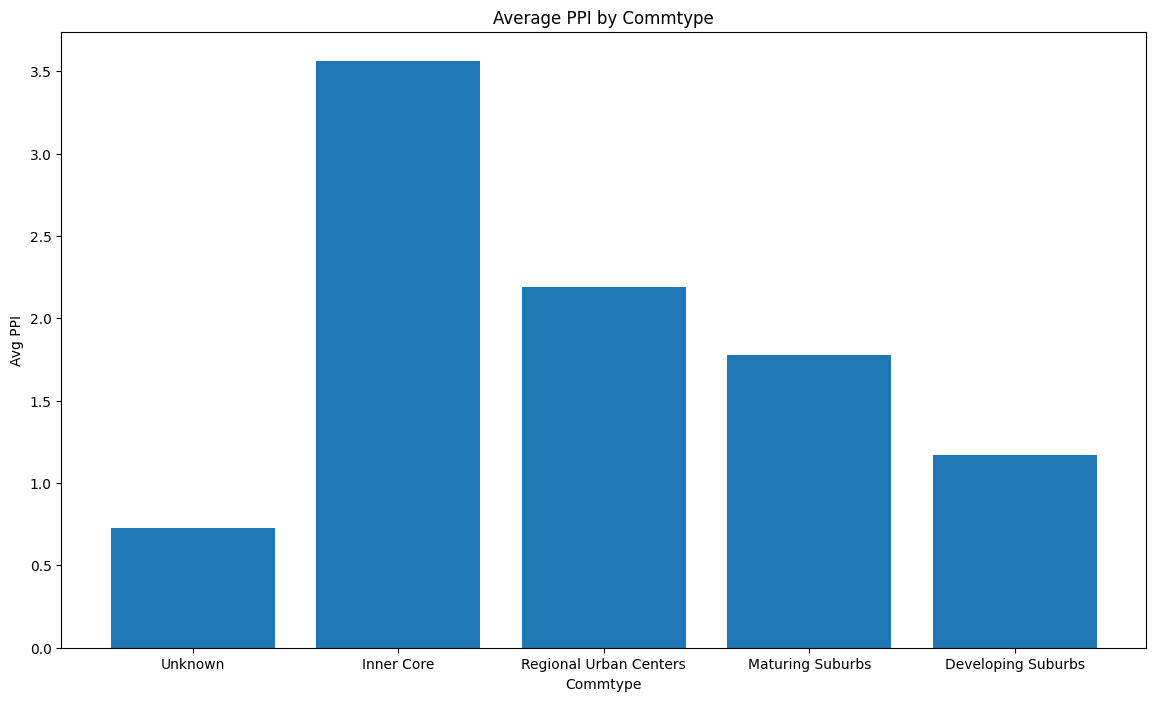

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Exploring mapc.health_mapc_ppi_g250.csv, calculated and plotted average ppi by commtype

ppi = pd.read_csv('../data/csv_files/mapc.health_mapc_ppi_g250.csv')

ppi.columns

ppi_filtered = ppi[['commtypid','commtype','ppi5']]

ppi_by_commtype = ppi_filtered.groupby(['commtypid','commtype']).mean().reset_index()

ppi_by_commtype.iloc[0,1] = "Unknown"

plt.figure(figsize=(14,8))
plt.bar(ppi_by_commtype["commtype"], ppi_by_commtype["ppi5"])
plt.xlabel("Commtype")
plt.ylabel("Avg PPI")
plt.title("Average PPI by Commtype")
plt.show()

In [17]:
ppi.head()

,objectid,g250m_id,commtypid,commtype,nhwhi_10,nhaa_10,nhapi_10,lat_10,nhoth_10,ppi5,shape
0,1,144054.0,3,Maturing Suburbs,26.88,0.37,3.03,0.37,1.04,2,3C00000005000000080010006A69000020000000011000...
1,2,115030.0,3,Maturing Suburbs,33.00,0.00,14.59,0.31,2.10,1,3C00000005000000080010006A69000020000000011000...
2,3,232476.0,4,Developing Suburbs,2.66,0.00,0.00,0.00,0.00,4,3C00000005000000080010006A69000020000000011000...
3,4,112471.0,4,Developing Suburbs,1.34,0.00,0.04,0.02,0.00,0,3C00000005000000080010006A69000020000000011000...
4,5,148255.0,1,Inner Core,0.00,0.00,0.00,0.00,0.00,0,0C01000028000000080010006A690000B0030000011000...


In [ ]:
import requests
import folium
import random

# Replace with your own api_key
api_key = ""

# Define the API endpoint
endpoint = "https://www.airnowapi.org/aq/observation/latLong/current/"

# Specify latitude and longitude boundaries
min_latitude = 42.202941
max_latitude = 42.475
min_longitude = -71.271667
max_longitude = -70.909495

# Set larger step sizes for latitude and longitude to increase data points
latitude_step = 0.005  # Adjust the step size as needed
longitude_step = 0.005  # Adjust the step size as needed

# Initialize a map centered on Boston
boston_map = folium.Map(location=[42.3601, -71.0589], zoom_start=10)

# Calculate the radius for a 15-mile radius (approximately 24,140 meters)
radius_meters = 1000

# Loop through latitude and longitude ranges
lat = min_latitude
lon = min_longitude

while lat <= max_latitude:
    while lon <= max_longitude:
        latitude = lat
        longitude = lon

        # Define parameters for the API request
        parameters = {
            "format": "application/json",
            "latitude": latitude,
            "longitude": longitude,
            "name": "NOT Master bedroom,NOT Needham private residence",  # Exclude specified names
            "API_KEY": api_key,
        }

        # Send the API request
        response = requests.get(endpoint, params=parameters)

        if response.status_code == 200:
            # Request was successful
            data = response.json()
            for item in data:
                aqi = item["AQI"]
                color = "#{:02x}{:02x}{:02x}".format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

                # Create a Circle for each data point with the adjusted radius
                folium.Circle(
                    location=[item["Latitude"], item["Longitude"]],
                    radius=radius_meters,  # Use the calculated radius
                    color=color,
                    fill=True,
                    fill_color=color,
                    fill_opacity=0.2,
                    popup=f"AQI: {aqi}",
                ).add_to(boston_map)
        else:
            # Handle error
            print(f"Error for latitude {latitude}, longitude {longitude}: {response.status_code}")
            
        lat += latitude_step
        lon += longitude_step
        

# Save the map as an HTML file
boston_map.save("boston_air_quality_map_with_more_clusters.html")
